<a href="https://colab.research.google.com/github/albin2122/Cleaning-Movie-Dataset/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Task 2**    -  **Data Cleansing and Transformation**



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
movie_df=pd.read_csv("/content/drive/MyDrive/MYM/Task 2/movies.csv")

In [4]:
movie_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


**Variable Description**:

MOVIES: Movie name \
YEAR: The year of movie or tv shows telecast for audience \
GENRE: Genre of the Movie/ TV Shows \
RATING: The audience thought about movie or tv show given \
ONE-LINE: The short description about movie or tv show for audience first impression \
STARS: The casting \
VOTES: The audience express their view \
RunTime: The duration of running time \
Gross: Global earning for the movie/ tv shows 

In [5]:
movie_df.shape

(9999, 9)

In [6]:
movie_df.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')

In [7]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
print("Missing Values:\n")
for col in movie_df.columns:
    missing = movie_df[col].isna().sum()
    percent = missing / movie_df.shape[0] * 100
    print("%s: %.2f%% (%d)" % (col,percent,missing))

Missing Values:

MOVIES: 0.00% (0)
YEAR: 6.44% (644)
GENRE: 0.80% (80)
RATING: 18.20% (1820)
ONE-LINE: 0.00% (0)
STARS: 0.00% (0)
VOTES: 18.20% (1820)
RunTime: 29.58% (2958)
Gross: 95.40% (9539)


## Address data quality issues (missing values, inconsistent formats, outliers)

### Missing values

Columns Year, genre,rating , votes,runtime and gross are having null values.

In [9]:
#column year
movie_df[movie_df['YEAR'].isna()]

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
878,Vikings: Valhalla,NaN,"\nAction, Adventure, Drama",NaN,\nFollow-up series to 'Vikings' set 100 years ...,"\n \n Stars:\nLaura Berlin, \nSa...",NaN,NaN,NaN
1375,Resident Evil,NaN,"\nAction, Horror, Sci-Fi",NaN,\nNearly three decades after the discovery of ...,"\n \n Stars:\nLance Reddick, \nS...",NaN,NaN,NaN
1414,Bright 2,NaN,"\nAction, Adventure, Crime",NaN,\nPlot unknown. Sequel to the 2017 film 'Bright.',"\n \n Stars:\nWill Smith, \nJoel...",NaN,NaN,NaN
1419,Avatar: The Last Airbender,NaN,"\nAction, Adventure, Fantasy",NaN,\nLive-action adaptation of the animated serie...,\n,NaN,NaN,NaN
1425,Home Team,NaN,"\nComedy, Sport",NaN,\nThe story about New Orleans Saints head coac...,"\n Directors:\nCharles Francis Kinnane, \nD...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9909,Pretty Smart,NaN,\nComedy,NaN,\nAdd a Plot\n,"\n \n Stars:\nCinthya Carmona, \...",NaN,NaN,NaN
9910,Pretty Smart,NaN,\nComedy,NaN,\nAdd a Plot\n,\n Director:\nJody Margolin Hahn\n| \n S...,NaN,NaN,NaN
9911,Pretty Smart,NaN,\nComedy,NaN,\nAdd a Plot\n,\n Director:\nJody Margolin Hahn\n| \n S...,NaN,NaN,NaN
9912,Pretty Smart,NaN,\nComedy,NaN,\nAdd a Plot\n,"\n \n Stars:\nCinthya Carmona, \...",NaN,NaN,NaN


In [10]:
movie_df['YEAR']

0            (2021)
1          (2021– )
2       (2010–2022)
3          (2013– )
4            (2021)
           ...     
9994       (2021– )
9995       (2021– )
9996       (2022– )
9997       (2021– )
9998       (2021– )
Name: YEAR, Length: 9999, dtype: object

In [11]:
# Extracting Year from original YEARS column

movie_df['Year'] = movie_df['YEAR'].str.extract(r'([0-9]{4}–.*|[0-9]{4})')
movie_df['Year'] = movie_df['Year'].str.strip().replace(")","")

def extract_year(year):
    if year[-3:] == '– )':
        return year.replace('– )',"–")
    else:
        return year.replace(')',"")

movie_df['Year'] = movie_df['Year'].fillna('Unknown')
movie_df['Year'] = movie_df['Year'].apply(lambda y: extract_year(y))
    
year_count = movie_df[movie_df['Year'] != 'Unknown']['Year'].value_counts().reset_index().rename(columns = {'Year':'Count','index':'Year'})
year_count.head()

,Year,Count
0,2020–,898
1,2020,742
2,2021–,661
3,2019,657
4,2019–,553


In [12]:
movie_df.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
Year           0
dtype: int64

In [13]:
# removing column YEAR
movie_df.drop(columns=['YEAR'],inplace=True)

In [14]:
movie_df

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,Year
0,Blood Red Sky,"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,2021
1,Masters of the Universe: Revelation,"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,2021–
2,The Walking Dead,"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,2010–2022
3,Rick and Morty,"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,2013–
4,Army of Thieves,"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN,2021
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN,2021–
9995,Arcane,"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN,2021–
9996,Heart of Invictus,"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN,2022–
9997,The Imperfects,"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN,2021–


Column Genre

In [15]:
movie_df['GENRE'].isnull().sum()

80

In [16]:
# Genre is a column that we cant mess with.
# We cant use  imputation method or any other method
# so we are replacing the null values with 'Unknown'
movie_df['GENRE'].fillna('Unknown', inplace=True)  # Fill missing Genre with 'Unknown'

Column **Rating**

In [17]:
movie_df['RATING'].isnull().sum()

1820

18% of datas are missing. 

In [18]:
movie_df.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [19]:
# replacing null values in rating by the mean
movie_df['RATING']=movie_df['RATING'].fillna(movie_df['RATING'].mean())

Column votes

In [20]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   GENRE     9999 non-null   object 
 2   RATING    9999 non-null   float64
 3   ONE-LINE  9999 non-null   object 
 4   STARS     9999 non-null   object 
 5   VOTES     8179 non-null   object 
 6   RunTime   7041 non-null   float64
 7   Gross     460 non-null    object 
 8   Year      9999 non-null   object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [21]:
movie_df['VOTES'] = movie_df['VOTES'].str.replace(",","")
movie_df['VOTES'] 

0        21062
1        17870
2       885805
3       414849
4          NaN
         ...  
9994       NaN
9995       NaN
9996       NaN
9997       NaN
9998       NaN
Name: VOTES, Length: 9999, dtype: object

In [22]:
# Replacing null values with 0
movie_df['VOTES'] = movie_df['VOTES'].fillna(0)
# converting type of 'VOTES' to int
movie_df['VOTES'] = movie_df['VOTES'].astype(int)

Column Runtime

In [23]:
# we cant do anything on runtime , so lets replace it by 0
# Replacing null values with 0
movie_df['RunTime'] = movie_df['RunTime'].fillna(0)

Column Gross

In [24]:
# dropping column Gross , since 95% of data is missing
movie_df.drop(columns=['Gross'],inplace=True)

In [25]:
movie_df.isnull().sum()

MOVIES      0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
RunTime     0
Year        0
dtype: int64

we are done dealing with null values, now lets clean the textual data


## Cleaning

In [26]:
movie_df.head()

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Year
0,Blood Red Sky,"\nAction, Horror, Thriller",6.100000,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,21062,121.0,2021
1,Masters of the Universe: Revelation,"\nAnimation, Action, Adventure",5.000000,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...",17870,25.0,2021–
2,The Walking Dead,"\nDrama, Horror, Thriller",8.200000,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...",885805,44.0,2010–2022
3,Rick and Morty,"\nAnimation, Adventure, Comedy",9.200000,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...",414849,23.0,2013–
4,Army of Thieves,"\nAction, Crime, Horror",6.921176,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,0,0.0,2021


In [27]:
# we need to deal with Genre, one-line and stars
# Removing "\n" from GENRE, ONE-LINE, and STARS columns
for col in ['GENRE','ONE-LINE','STARS']:
    movie_df[col] = movie_df[col].str.replace("\n","").str.strip()

movie_df.head()


,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Year
0,Blood Red Sky,"Action, Horror, Thriller",6.100000,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,21062,121.0,2021
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.000000,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",17870,25.0,2021–
2,The Walking Dead,"Drama, Horror, Thriller",8.200000,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",885805,44.0,2010–2022
3,Rick and Morty,"Animation, Adventure, Comedy",9.200000,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...",414849,23.0,2013–
4,Army of Thieves,"Action, Crime, Horror",6.921176,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,0,0.0,2021


In [28]:
# creating new column Director from stars
def extract_director(direc):
    if 'Director' in direc or 'Directors' in direc:
        director = direc.strip().split("|")[0] # The Second Half is the stars
        return director.split(":")[1] # Return the Director name
    else:
        return ''

def extract_stars(stars):
    if 'Star' not in stars or 'Stars' not in stars:
        return ''
    else:
        return stars.split(":")[-1] # last value in this list will be the stars

movie_df['Director'] = movie_df['STARS'].apply(lambda d: extract_director(d))
movie_df['Stars'] = movie_df['STARS'].apply(lambda s: extract_stars(s))

# View head of these columns
movie_df[['STARS','Director','Stars']].head()

,STARS,Director,Stars
0,Director:Peter Thorwarth| Stars:Peri Baume...,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,"Stars:Justin Roiland, Chris Parnell, Spencer G...",,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Director:Matthias Schweighöfer| Stars:Matt...,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


In [29]:
movie_df.head()

,MOVIES,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Year,Director,Stars
0,Blood Red Sky,"Action, Horror, Thriller",6.100000,A woman with a mysterious illness is forced in...,Director:Peter Thorwarth| Stars:Peri Baume...,21062,121.0,2021,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.000000,The war for Eternia begins again in what may b...,"Stars:Chris Wood, Sarah Michelle Gellar, Lena ...",17870,25.0,2021–,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,"Drama, Horror, Thriller",8.200000,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars:Andrew Lincoln, Norman Reedus, Melissa M...",885805,44.0,2010–2022,,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,"Animation, Adventure, Comedy",9.200000,An animated series that follows the exploits o...,"Stars:Justin Roiland, Chris Parnell, Spencer G...",414849,23.0,2013–,,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,"Action, Crime, Horror",6.921176,"A prequel, set before the events of Army of th...",Director:Matthias Schweighöfer| Stars:Matt...,0,0.0,2021,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


In [30]:
#removing column 'STARS'
movie_df.drop(columns=['STARS'],inplace=True)

In [31]:
movie_df.head()

,MOVIES,GENRE,RATING,ONE-LINE,VOTES,RunTime,Year,Director,Stars
0,Blood Red Sky,"Action, Horror, Thriller",6.100000,A woman with a mysterious illness is forced in...,21062,121.0,2021,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,"Animation, Action, Adventure",5.000000,The war for Eternia begins again in what may b...,17870,25.0,2021–,,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,"Drama, Horror, Thriller",8.200000,Sheriff Deputy Rick Grimes wakes up from a com...,885805,44.0,2010–2022,,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,"Animation, Adventure, Comedy",9.200000,An animated series that follows the exploits o...,414849,23.0,2013–,,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Army of Thieves,"Action, Crime, Horror",6.921176,"A prequel, set before the events of Army of th...",0,0.0,2021,Matthias Schweighöfer,"Matthias Schweighöfer, Nathalie Emmanuel, Ruby..."


### Validate the cleaned and transformed dataset for integrity and usability

<ipython-input-32-3ea0a91a7f7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(movie_df['RATING'])


<Axes: xlabel='RATING', ylabel='Density'>

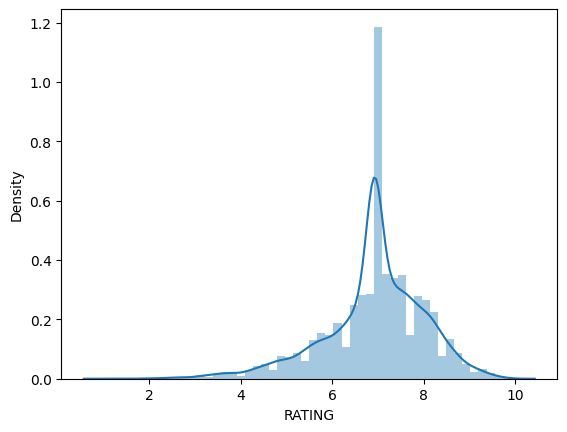

In [32]:
sns.distplot(movie_df['RATING'])

In [33]:
# Count number of Genre
from collections import Counter

genre_raw = movie_df['GENRE'].dropna().to_list()
genre_list = list()

for genres in genre_raw:
    genres = genres.split(", ")
    for g in genres:
        genre_list.append(g)
        
genre_df = pd.DataFrame.from_dict(Counter(genre_list), orient = 'index').rename(columns = {0:'Count'})
genre_df.head()

,Count
Action,2258
Horror,553
Thriller,910
Animation,1732
Adventure,1792


In [34]:
fig = px.pie(data_frame = genre_df,
             values = 'Count',
             names = genre_df.index,
             color_discrete_sequence = px.colors.qualitative.Safe)

fig.update_traces(textposition = 'inside',
                  textinfo = 'label+percent',
                  pull = [0.05] * len(genre_df.index.to_list()))

fig.update_layout(title = {'text':'Genre Distribution'},
                  legend_title = 'Gender',
                  uniformtext_minsize=13,
                  uniformtext_mode='hide',
                  font = dict(
                      family = "Courier New, monospace",
                      size = 18,
                      color = 'black'
                  ))


fig.show()

In [35]:
fig = px.bar(data_frame = movie_df[~(movie_df['Director'] == "")]['Director'].value_counts().reset_index().head(10),
             x = 'index', y = 'Director')

fig.update_layout(title = 'Director(s) Distribution',
                  xaxis_title = 'Director(s)',
                  yaxis_title = 'Count')

fig.show()

## Duplicates

In [36]:
movie_df[movie_df.duplicated()]

,MOVIES,GENRE,RATING,ONE-LINE,VOTES,RunTime,Year,Director,Stars
6833,Mighty Little Bheem,"Animation, Short, Adventure",6.921176,Add a Plot,0,0.0,2019–,"Rajiv Chilaka, Krishna Mohan Chintapatla",
6835,Mighty Little Bheem,"Animation, Short, Adventure",9.000000,Add a Plot,6,0.0,2019–,"Rajiv Chilaka, Krishna Mohan Chintapatla",
6836,Mighty Little Bheem,"Animation, Short, Adventure",9.000000,Add a Plot,6,0.0,2019–,"Rajiv Chilaka, Krishna Mohan Chintapatla",
6837,Mighty Little Bheem,"Animation, Short, Adventure",6.921176,Add a Plot,0,0.0,2019–,"Rajiv Chilaka, Krishna Mohan Chintapatla",
6838,Mighty Little Bheem,"Animation, Short, Adventure",6.921176,Add a Plot,0,0.0,2019–,"Rajiv Chilaka, Krishna Mohan Chintapatla",
...,...,...,...,...,...,...,...,...,...
9989,1899,"Drama, History, Horror",6.921176,Add a Plot,0,0.0,2022–,Baran bo Odar,
9990,1899,"Drama, History, Horror",6.921176,Add a Plot,0,0.0,2022–,Baran bo Odar,
9991,1899,"Drama, History, Horror",6.921176,Add a Plot,0,0.0,2022–,Baran bo Odar,
9992,1899,"Drama, History, Horror",6.921176,Add a Plot,0,0.0,2022–,Baran bo Odar,


In [37]:
# Drop duplicates based on all columns
movie_df.drop_duplicates(inplace=True)

In [38]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9561 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9561 non-null   object 
 1   GENRE     9561 non-null   object 
 2   RATING    9561 non-null   float64
 3   ONE-LINE  9561 non-null   object 
 4   VOTES     9561 non-null   int64  
 5   RunTime   9561 non-null   float64
 6   Year      9561 non-null   object 
 7   Director  9561 non-null   object 
 8   Stars     9561 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 747.0+ KB


## Cleaning text data

In [39]:
# List of columns to convert to lowercase
columns_to_convert = ['MOVIES', 'GENRE', 'ONE-LINE','Director','Stars']

# Convert the specified columns from uppercase to lowercase
for column in columns_to_convert:
    movie_df[column] = movie_df[column].str.lower()

## Validating Cleaned Dataset

Column validation:  The columns in the dataset match the expected data types, formats, and constraints. Each column contains the appropriate data and has consistent formatting. we have extracted Column Director from the column Stars. Column Gross was removed due to excessive loss of dat

Missing value validation: Confirmed that missing values have been handled appropriately. Column gross was dropped, and rest of the columns that has missing values is imputed and replaced it with apt figures

Duplicate validation: duplicates values were removed as per the necessary ideals

Statistical validation: 

In [43]:
movie_df.describe(include='all')

,MOVIES,GENRE,RATING,ONE-LINE,VOTES,RunTime,Year,Director,Stars
count,9561,9561,9561.000000,9561,9.561000e+03,9561.000000,9561,9561,9561
unique,6816,511,NaN,8686,NaN,NaN,265,3709,6482
top,bleach: burîchi,comedy,NaN,add a plot,NaN,NaN,2020–,,
freq,65,837,NaN,839,NaN,NaN,878,3444,1196
mean,NaN,NaN,6.919914,NaN,1.293793e+04,50.483213,NaN,NaN,NaN
std,NaN,NaN,1.127591,NaN,6.501137e+04,50.664467,NaN,NaN,NaN
min,NaN,NaN,1.100000,NaN,0.000000e+00,0.000000,NaN,NaN,NaN
25%,NaN,NaN,6.400000,NaN,6.500000e+01,0.000000,NaN,NaN,NaN
50%,NaN,NaN,6.921176,NaN,4.910000e+02,43.000000,NaN,NaN,NaN
75%,NaN,NaN,7.600000,NaN,2.904000e+03,87.000000,NaN,NaN,NaN


## Document the steps taken and provide clear explanations.

To clean the movies dataset, I typically follow a series of steps to handle missing values, remove duplicates,  and address other data quality issues. Here is a generalized outline of the steps commonly taken to clean a movies dataset:

Load the dataset: We Read the movies dataset into a pandas DataFrame using read_csv 

Explore the data: Understood the structure of the dataset, examine the column names, data types, and sample records. Identify any potential issues or inconsistencies.

Handle missing values: Evaluated the presence of missing values in the dataset. We have found missing values in columns year,genre, rating, votes, runtime,gross. For column genre , we have replaced it by 'unknown'. For votes we have replaced it by the mean.

Remove duplicates: Check for duplicate records in the datset and remove them to avoid duplication bias or incorrect analysis results. Used  drop_duplicates() method to eliminate duplicates based on specific columns or the entire record.

## Present the cleaned and transformed dataset for further analysis.

In [41]:
# Save the cleaned dataset to a new file
movie_df.to_csv('cleaned_movie_dataset.csv', index=False)